# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We Team GM3, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id = 'Overview'></a><br>
### Predict Overview: EDSA Movie Recommendation 2022
[Back to table of Contents](#Table_Contents)

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

Like many machine learning techniques, a recommender system makes prediction based on users' historical behaviors. Specifically, it's to predict user preference for a set of items based on past experience. To build a recommender system, the most two popular approaches are Content-based and Collaborative Filtering. 
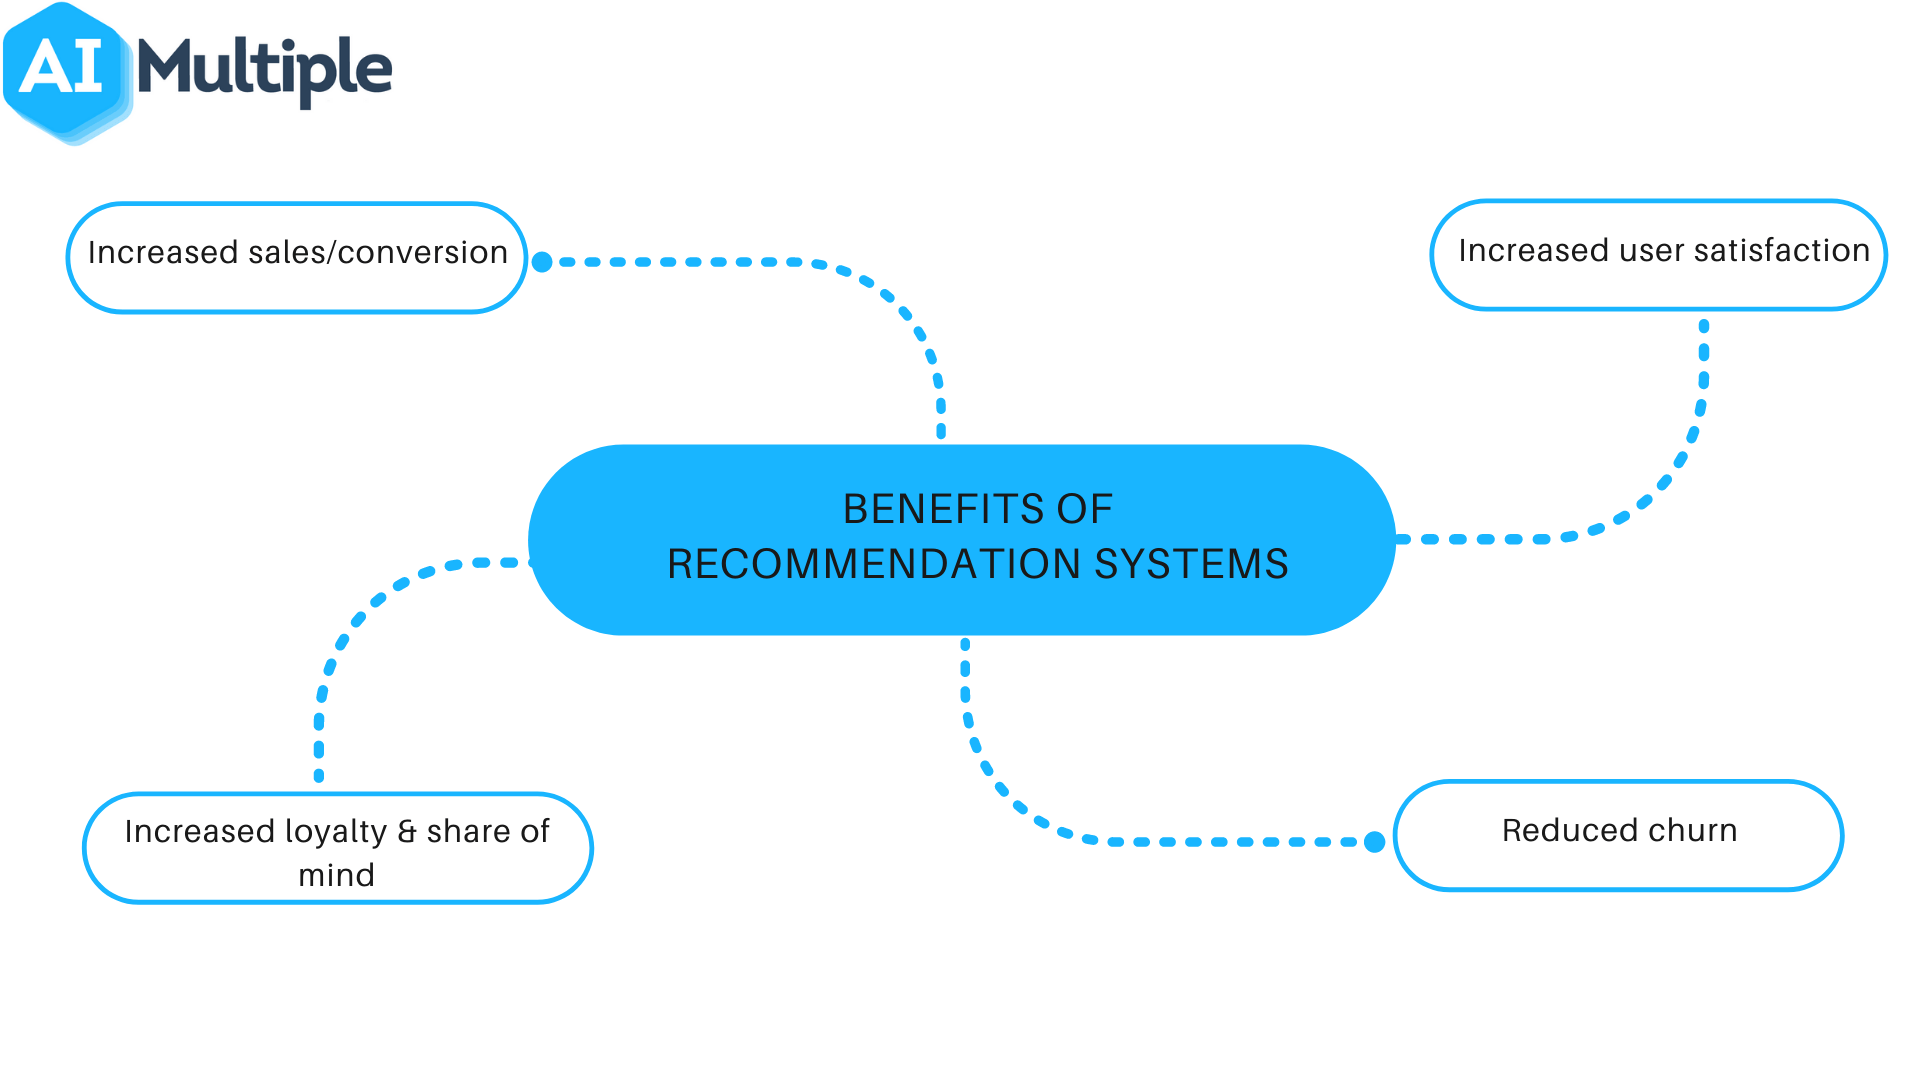


<a id='Table_Contents'></a><br>
## Table of Contents

1. [Predict Overview: EDSA Movie Recommendation 2022](#Overview)


2. [Imports and Data](#imports_data)
 * Comet
 * Importing libraries
 * Loading Data
 * Anaylsing The Data Structure
 * Searching for Duplicate Rows in Dataset
 * Searching for NaN Values in the Dataset
 

3. [Exploratory Data Analysis](#EDA_raw)
 * Train Dataset
 * Movies Dataset
 * Tags Dataset
 * Links Dataset
 * Combined Dataset for Further Analysis
 * Sex and Animation
 

4. [Recommender Systems](#Recommend)
 * What is a Recommender System
 * Types of Recommender Systems
 * Content Based
 * Collabrotive Based 
 
 
<a href=#seven>5. Data Engineering</a>

<a href=#eight>6. Model creation </a>

<a href=#nine>7. Model Improvements</a>

<a href=#ten>8. Model Evaluation</a>

<a href=#eleven>9. Discuss chosen methods logic</a>

<a href=#twelve>10. Conclusions</a>

<a href=#thirteen>11. Recommendations</a>

<a id = 'imports_data'></a><br>
## 2. Imports and Data

[Back to table of Contents](#Table_Contents)
---  
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

<a id="comet"></a>
# Starting a Comet experiment
<img src="https://www.comet.ml/images/logo_comet_light.png" width="350" alt="Drawing" style="width: 350px;"/>
We will be using Comet as a form of version control throughout the development of our model

In [1]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="clnZaB7dekcoJY7FUNcktpBAZ",
    project_name="unsupervised-learning-gm3",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/will-i-am18/unsupervised-learning-gm3/18cc33c37f81432cb45e94f73d54ab21



# Import necessary libraries

This notebook requires some packages that may not be installed on your local machine. Below we provide a list of packages to be installed (if they are not yet installed) as well as the code to install them.  

Run the following commands within Git bash (Windows), terminal (Mac/Linux):  

- Comet_ml - `pip install comet_ml==3.1.9`    
- flowtensor - `pip install tensorflow==2.9.1`  
- pyspark - `pip install pyspark==3.3.0`  
- Pyspellchecker - `pip install pyspellchecker==0.5.4`  
- Ftfy - `pip install ftfy==5.7`  
- surprise - `pip install surprise == 1.1.0`

In [2]:
# import comet_ml in the top of your file
from comet_ml import Experiment

# import comet_ml in the top of your file
from comet_ml.api import API, APIExperiment

#Inspecting
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from functools import reduce

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
large = 22; med = 16; small = 12
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)
from wordcloud import WordCloud
from PIL import Image
import collections
from matplotlib import style
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize': [16, 12]})

#images
from IPython.display import Image
from IPython.core.display import HTML 

# Shrinking Data
from sklearn.utils import shuffle
from collections import Counter

#Recommendation
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from fuzzywuzzy import fuzz 
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, linear_kernel


#Cleaning
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import random
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer


#vectorize
from sklearn.feature_extraction.text import TfidfVectorizer

#Surprise Package to predict with colaborative filtering
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import Reader, Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import LeaveOneOut

#Big Data modelling
import findspark
findspark.init()
import pyspark.sql.functions as sql_func
from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS, ALSModel
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql import SparkSession
from pyspark.ml.feature import CountVectorizer, IDF
from pyspark.ml.regression import LinearRegression
spark = SparkSession.builder.appName('recommender').getOrCreate()

#save model
import pickle

C:\Users\Aphiwe Rasisemula\AppData\Local\Temp\ipykernel_16264\3455581934.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Loading Data

In [3]:
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

## Analysing The Data Structure

In [4]:
#Train dataset
print(train.describe())

             userId       movieId        rating     timestamp
count  1.000004e+07  1.000004e+07  1.000004e+07  1.000004e+07
mean   8.119909e+04  2.138911e+04  3.533395e+00  1.215677e+09
std    4.679359e+04  3.919578e+04  1.061124e+00  2.268921e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.197000e+03  3.000000e+00  1.011742e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.199019e+09
75%    1.215790e+05  8.630000e+03  4.000000e+00  1.447242e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


In [5]:
#Genome Scores 
print(genome_scores.describe())

            movieId         tagId     relevance
count  1.558445e+07  1.558445e+07  1.558445e+07
mean   4.602249e+04  5.645000e+02  1.163679e-01
std    5.535221e+04  3.256254e+02  1.544722e-01
min    1.000000e+00  1.000000e+00  2.500000e-04
25%    3.853750e+03  2.827500e+02  2.400000e-02
50%    8.575500e+03  5.645000e+02  5.650000e-02
75%    8.018650e+04  8.462500e+02  1.407500e-01
max    2.064990e+05  1.128000e+03  1.000000e+00


In [6]:
# Genome Tags
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [7]:
# Tags
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [8]:
# IMDB Dataset
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [9]:
# Links Dataset
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [10]:
# Movies Dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## Searching for Duplicate Rows 

In [11]:
#Check for duplicates
duplicate_rows_train = train.duplicated().sum()
duplicate_rows_test = test.duplicated().sum()
duplicate_rows_genome_scores = genome_scores.duplicated().sum()
duplicate_rows_tags = tags.duplicated().sum()
duplicate_rows_links = links.duplicated().sum()
duplicate_rows_movies = movies.duplicated().sum()

print('There are ',duplicate_rows_train,' duplicated rows for the training set')
print('There are ',duplicate_rows_test,' duplicated rows for the test set')
print('There are ',duplicate_rows_genome_scores,' duplicated rows for the genome scores set')
print('There are ',duplicate_rows_tags,' duplicated rows for the tags set')
print('There are ',duplicate_rows_links,' duplicated rows for the links set')
print('There are ',duplicate_rows_movies,' duplicated rows for the movies set')

There are  0  duplicated rows for the training set
There are  0  duplicated rows for the test set
There are  0  duplicated rows for the genome scores set
There are  0  duplicated rows for the tags set
There are  0  duplicated rows for the links set
There are  0  duplicated rows for the movies set


From analysing the structure and missing values of each dataframe, the data that won't be analysed in the EDA is the genome tags as 1128 observations is very little variance compared to the data that is being used in the training the set or other data being analysed.

## Searching for NaN values in datasets

In [12]:
# Train Dataset
print(train.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [13]:
# Test Dataset
print(train.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [14]:
# Genome Scores 
print(genome_scores.isna().sum())

movieId      0
tagId        0
relevance    0
dtype: int64


In [15]:
# Genome Tags
print(genome_tags.isna().sum())

tagId    0
tag      0
dtype: int64


In [16]:
# Imbd Data
print(imdb.isna().sum())

movieId          0    
title_cast       10068
director         9874 
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


In [17]:
# Imbd Data
print(imdb.isna().sum())

movieId          0    
title_cast       10068
director         9874 
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


In [18]:
# Links Dataset
print(links.isna().sum())

movieId    0  
imdbId     0  
tmdbId     107
dtype: int64


In [19]:
# Movies Dataset
print(movies.isna().sum())

movieId    0
title      0
genres     0
dtype: int64


In [20]:
# Tags Dataset
print(tags.isna().sum())

userId       0 
movieId      0 
tag          16
timestamp    0 
dtype: int64


In [21]:
#Remove NaN values from the datasets being analysed
tags = tags.dropna()
links = links.dropna()

<a id = 'EDA_raw'></a><br>
# 3. Exploratory Data Analysis
[Back to Table of Contents](#Table_Contents)

## Train Dataset

In [22]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


The train dataframe has 4 columns.

- userId - Every user is represented by an unique Id.
- movieId - Every movie is represented by an uniue Id.
- rating - Represents the rating given by the user to the corresponding movie.
- timestamp - The time at which the rating was recorded.

In [23]:
train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


Some insights that can be drawn: <br>
<br>
The users have userId's in the range 1 - 16254 <br>
The minmum rating given to the movie is 0,5 whereas the maximum rating given to the movies is 5.0 <br>
The average rating that is the mean ratings given by the users to all the movies is 3.5 <br>
The movies have movieId's in the range 1 - 209171.( Note that 193609 is the highest movieId and not total number of movies.)

In [24]:
# Unique ratings
uniq_rating = train['rating'].unique()
uniq_rating = list(uniq_rating)
uniq_rating =  sorted(uniq_rating)
uniq_rating

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

There are 10 categories of ratings that the users could have chosen from to rate the movie. Lets look at the distributions of each rating.

### Ratings Histogram

Text(0.5, 1.0, 'Number of ratings for all users')

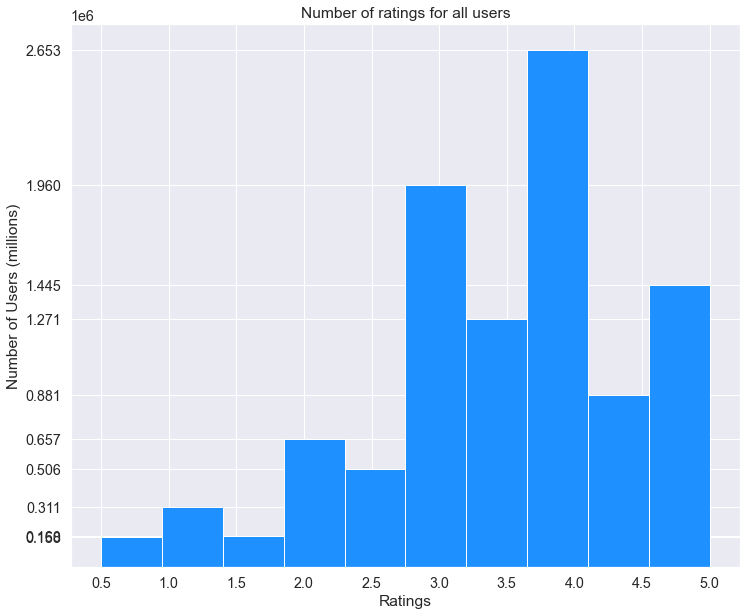

In [25]:
#groupby
df_ratings = train.groupby('rating').count()
ylims = df_ratings['userId'].values.tolist()

#Plot
fig, ax = plt.subplots(figsize = (12,10))
ax = train['rating'].plot(kind='hist', x = uniq_rating, xticks=uniq_rating, yticks = ylims,  color = 'dodgerblue')
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Users (millions)')
ax.set_title('Number of ratings for all users')

Most of the users have given a rating of 4.0 which is almost one third of total ratings given by the users. The distributions are skewed left, the mean is smaller than the median.<br> The histogram shows that majority of the users rated movies between 2.5 - 5 stars.

## Movies Dataset

In [26]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The movies dataframe has 3 columns.

- movieId - Every movie is represented by an uniue Id.
- title - Represents the movie title for the given movieId
- genres - The genres belonging to each movie.


Now, looking at the ‘genre’ column in movie dataset, we find that genre is string type and separated by ’|’. So, here we will convert it into list of genre and separate it genre-wise and keep it new column ‘Genre_Cat’.

In [27]:
# Creating a new column 'Genre_Cat'
movies['Genre_Cat'] = movies['genres'].str.split('|')
movies.head()

,movieId,title,genres,Genre_Cat
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [28]:
# Create a function to find genres in the dataset

genres = {} # create a dictionary to store different genre values

def find_genres():
    for genre in movies['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [29]:
#Checking and counting the genres in the dataset
genres

{'Adventure': 4145,
 'Animation': 2929,
 'Children': 2935,
 'Comedy': 16870,
 'Fantasy': 2731,
 'Romance': 7719,
 'Drama': 25606,
 'Action': 7348,
 'Crime': 5319,
 'Thriller': 8654,
 'Horror': 5989,
 'Mystery': 2925,
 'Sci-Fi': 3595,
 'IMAX': 195,
 'Documentary': 5605,
 'War': 1874,
 'Musical': 1054,
 'Western': 1399,
 'Film-Noir': 353,
 '(no genres listed)': 5062}

Now lets visualize this information using a pie chart

### Genres Pie Chart

In [30]:
#Counting each genre
genre_counter = {}
for index,row in movies.iterrows():
    for genre in row['Genre_Cat']:
        genre_counter[genre] = genre_counter.get(genre,0) +1

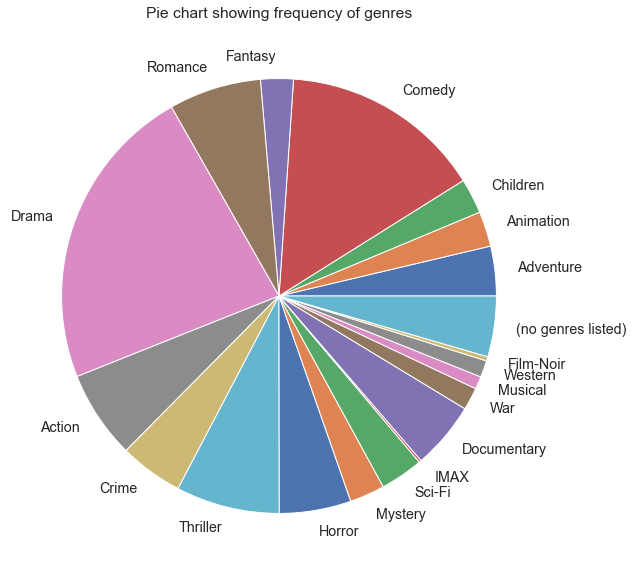

In [31]:
#Plot pie chart of genres
plt.figure(figsize = (12, 10))
plt.pie(list(genre_counter.values()),labels = genre_counter.keys())
plt.title('Pie chart showing frequency of genres')
plt.show()

### Genres Word Cloud

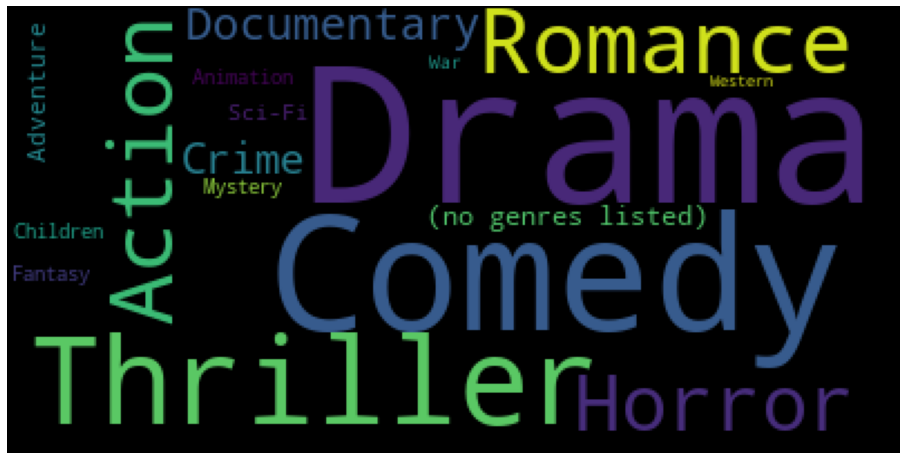

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, height=200, background_color = 'black', min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Insights: <br>

We can see from the pie chart as well as the world cloud that the most common genres are Drama, Comedy and Romance

## Tags Dataset

In [33]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In the tags we have a column 'tag' which are words that are used to decribe the movie

### Tags Word Cloud

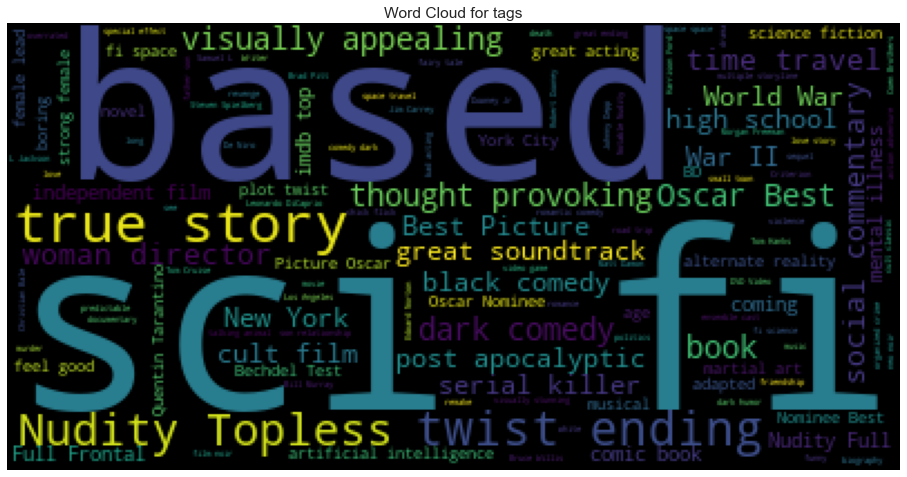

In [34]:
#Create WordCloud Plot
tag_words =' '.join([text for text in tags['tag']])
wordcloud = WordCloud(width=400, height=200, random_state=21, max_font_size=250, background_color='black').generate(tag_words)

plt.title("Word Cloud for tags")
plt.imshow(wordcloud)
plt.axis('off')
sns.set(style="darkgrid")
sns.set_style('dark')
plt.show()

<p> The WordCloud shows the most spoken topics by increasing the size of those words, from this we can see 'Nudity Topless', 'twist ending','based on','true story', 'Oscar Best', 'sci fi' are the tags that are shown the most based on users descriptions. <br> Therefore I suspect that the movies rated the highest will have these aspects incorporated into the movie. Seems that movies based on a true story or science fiction appeared the most from  all the movies described.</p>

## Links Dataset

In [35]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [36]:
links.describe()

,movieId,imdbId,tmdbId
count,62316.000000,6.231600e+04,62316.000000
mean,122292.898774,1.457104e+06,155186.689999
std,63261.366338,2.098625e+06,153362.694700
min,1.000000,1.000000e+00,2.000000
25%,82233.000000,8.161050e+04,36768.750000
50%,138139.000000,3.256680e+05,86750.500000
75%,173267.500000,2.064717e+06,255255.250000
max,209171.000000,1.117094e+07,646282.000000


## Imdb Dataset

This shows that this dataframe does not have any valuable data, this table is used to connect the imdb data and tmdb data, so it will not be used in the recommendation algorithm.

In [37]:
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [38]:
imdb.shape

(27278, 6)

The imdb data dataframe has 6 columns.

- movieId - Every movie is represented by an uniue Id.
- title_cast - The names of the cast members.
- director - The name of the director for each movie.
- budget - The budget for each movie.
- runtime - The runtime for each movie.
- plot_keywords - Keywords of the plot for each movie.

### Title Cast

37% of the 'title_cast' column has missing data. This column contains the names of the actors and actresses of the respective movies. As such, the only way to impute the missing data would be to manually search for and add the cast members, which would be very labour intensive. 37% is a great proportion of the data, thus dropping rows containing missig values is a bad idea. Therefore we simply impute missing data with empty strings. 

We foresee this operation being done several times over, thus we will create a function for replacing missing values with empty strings.

In [39]:
def empty_strings(df, col):
    df = df.copy()
    df[col].fillna(value='',inplace=True)
    return df

In [40]:
imdb = empty_strings(imdb,'title_cast')

In [41]:
# Drop nulls for analysis
df_nonulls = imdb.dropna()

### Directors Word Cloud

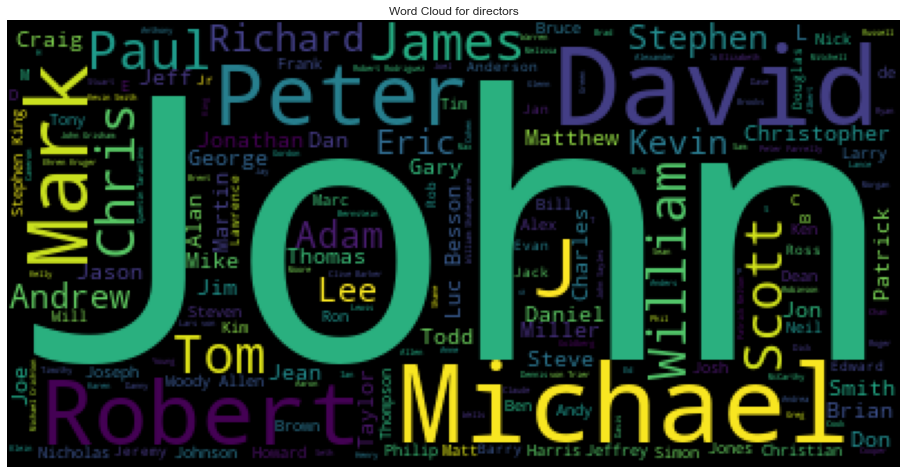

In [42]:
#Create WordCloud Plot
tag_words =' '.join([text for text in df_nonulls['director']])
wordcloud = WordCloud(width=400, height=200, random_state=21, max_font_size=200, background_color='black').generate(tag_words)

plt.title("Word Cloud for directors")
plt.imshow(wordcloud)
plt.axis('off')
sns.set(style="darkgrid")
sns.set_style('dark')
plt.show()

### Directors bar graph

<p> The word Cloud is not grouping the names and surnames together so a bar will show the top directors in a better representation.</p>

<AxesSubplot:title={'center':'Distribution of top Directors'}, xlabel='director'>

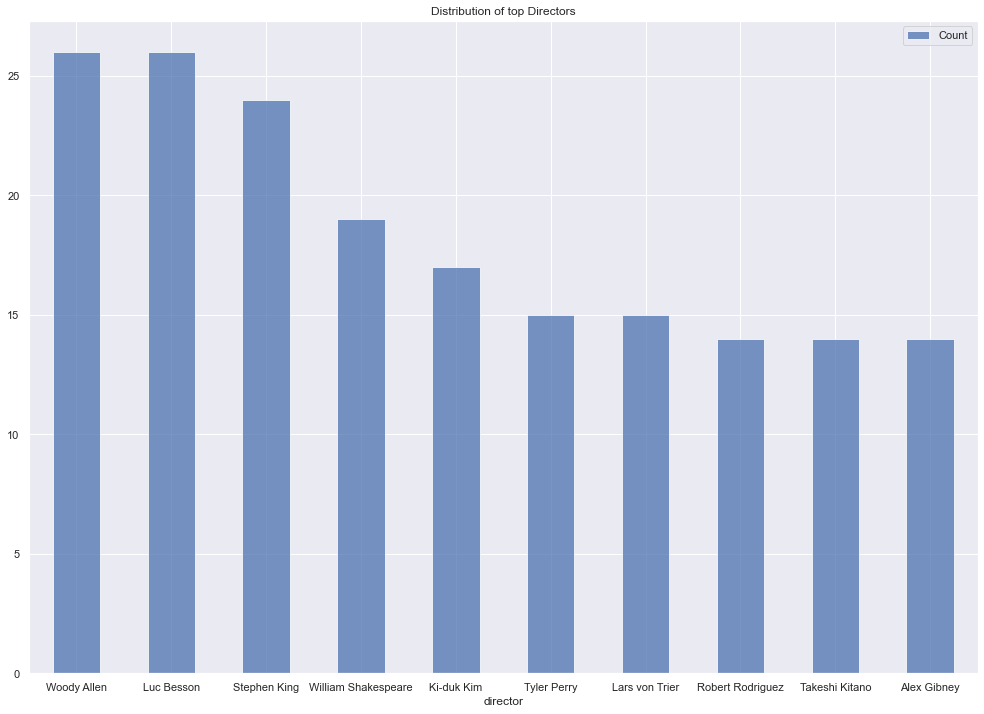

In [43]:
director_count_df = imdb.groupby(['director']).count()
director_count_df.drop(['title_cast','runtime','budget','plot_keywords'], axis=1, inplace=True)
director_count_df.rename(columns  = {'movieId':'Count'}, inplace=True)
director_count_df.sort_values(['Count'], ascending = False, inplace=True)
director_count_df = director_count_df.iloc[1:,:]
director_count_df.reset_index(inplace = True)
director_count_df.iloc[:10,:].plot(kind = 'bar', x = 'director', y = 'Count', title = 'Distribution of top Directors', 
                   figsize = (17,12), alpha=0.75, rot=0, grid = True, legend = True)

#### Budget

Dropping 71% of the data in the IMBD DataFrame is a bad idea, much like filling in missing budget data with 0. The budget of a movie, we intuitively assume, may be a great predictor of the quality of the movie and therefore a good predictor of whether someone may enjoy watching the movie, so we would like to keep budget as a feature. Let's do some investigating to decide on an approach to filling the missing budget data.

In [44]:
type(imdb['budget'][0])

str

In [45]:
imdb['budget'] = imdb['budget'].astype(str)

We must first convert the data type of the budget data to numbers for it to be of use in a model.

In [46]:
str_budget = []
for row in imdb['budget']:
    for string in row:
        if string[0]=='$':
            str_budget.append(row[1:])
            
budget = []
for number in str_budget:
    budget.append( int( number.replace(',','') ) )
imdb['budget'] = pd.Series(budget)

In [47]:
imdb['budget'] = imdb['budget'].astype(float)

Now that the 'budget' column contains only numbers, let's get back to filling in the missing data.

<AxesSubplot:>

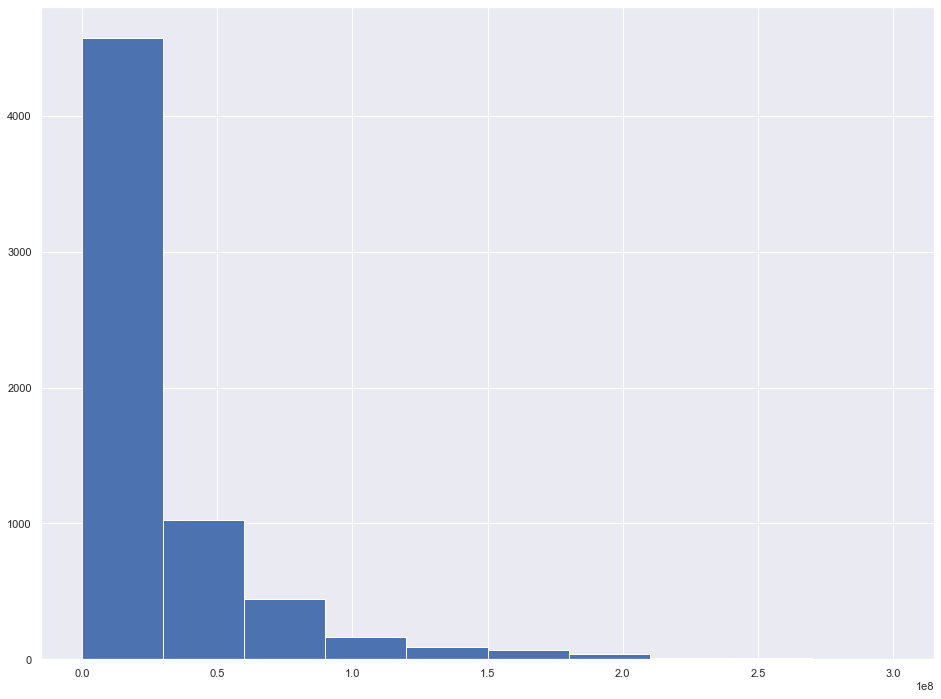

In [48]:
imdb['budget'].hist()

In [49]:
imdb['budget'].min()

0.0

In [50]:
imdb[imdb['budget']==0]

,movieId,title_cast,director,runtime,budget,plot_keywords
6161,6260,,NaN,NaN,0.0,NaN


There is one movie with a budget of $0, which is no doubt not possible. The same data entry is missing other data too, so we will drop it.

In [51]:
imdb.drop(6161,axis=0,inplace=True)

In [52]:
imdb['budget'].describe()

count    6.425000e+03
mean     2.574886e+07
std      3.510803e+07
min      4.000000e+00
25%      3.500000e+06
50%      1.300000e+07
75%      3.200000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [53]:
imdb['budget'].value_counts().head()

10000000.0    232
5000000.0     231
20000000.0    227
30000000.0    208
15000000.0    194
Name: budget, dtype: int64

Looking at the distribution of movie budgets, no ideas come to mind on how to deal with the missing budget data. The budget of a movie, we believe, must be a great contributer to the quality of the movie, thus we do not want to falsely attribute a high budget to a low budget movie or a low budget to a hight budget movie, as this will take away from the predictive value of the movie budget as a whole. We are better off dropping the budget column.

### Directors that have the highest runtime

In [54]:
# Top ten highest runtime 
imdb[imdb['runtime'].notnull()][['runtime', 'director','plot_keywords']].sort_values('runtime', ascending = False).head(10)

,runtime,director,plot_keywords
25918,877.0,Dakota Fanning,roswell new mexico|unidentified flying object|unidentified flying object crash|alien
18779,750.0,Sergey Bezrukov,gangster romanticization|criminal|homicide|murder
19557,644.0,Paul Joyce,filmmaker
20823,629.0,David Rudolf,columnist|blowpoke|blood|staircase
21032,600.0,David Ogden Stiers,big city life|new york city|urban setting|skyscraper
7356,594.0,Damian Lewis,airborne troops|american abroad|u.s. soldier|american soldier
9176,561.0,Kirsten Rolffes,doctor|hospital|denmark|dishwasher
7357,561.0,Kirsten Rolffes,doctor|hospital|denmark|dishwasher
13093,552.0,Irene Bedard,american indian|native american|cheyenne territory|cheyenne indian
21043,551.0,NaN,NaN


We can see that the director with the highest runtime is Dakota Fanning

In [55]:
Average_runtime = imdb['runtime'].mean()
print('The average runtime of all the movies is', Average_runtime)

The average runtime of all the movies is 100.31233129238265


### Anaylsing plot keywords

In [56]:
# Create a function to find plot keywords in the dataset

keywords = {} # create a dictionary to store different keyword values

def find_keywords():
    for keyword in df_nonulls['plot_keywords']:
        words = keyword.split('|')
        for word in words:
            keywords[word] = keywords.get(word, 0) + 1
            
find_keywords()

In [57]:
# Sorting dictionary in descending order
{k: v for k, v in sorted(keywords.items(), key=lambda item: item[1], reverse = True)}

{'female nudity': 137,
 'murder': 123,
 'character name as title': 120,
 'f rated': 111,
 'sex scene': 103,
 'love': 101,
 'new york city': 90,
 'police': 77,
 'psychotronic film': 76,
 'prison': 74,
 'female frontal nudity': 68,
 'friendship': 66,
 'revenge': 65,
 'female protagonist': 64,
 'friend': 64,
 'sex': 63,
 'bare chested male': 62,
 'alien': 61,
 'death': 61,
 'bare breasts': 58,
 'serial killer': 57,
 'nudity': 57,
 'male nudity': 56,
 'high school': 55,
 'dog': 53,
 'boy': 51,
 'male frontal nudity': 51,
 'one word title': 50,
 'topless female nudity': 50,
 'neo noir': 50,
 'man wears eyeglasses': 49,
 'violence': 49,
 'vampire': 48,
 'based on novel': 48,
 'sequel': 48,
 'title directed by female': 46,
 'cult film': 46,
 'suicide': 46,
 'marriage': 45,
 'wedding': 45,
 'scantily clad female': 44,
 'breasts': 44,
 'drugs': 44,
 'panties': 44,
 'male objectification': 43,
 'black comedy': 42,
 '2000s': 42,
 'money': 41,
 'gay': 41,
 '1990s': 40,
 'time bomb': 40,
 'male ful

As we can see the most popular plot keywords are:
- female nudity
- murder
- character name as title
- f rated
- sex scenes

## Combining Datasets for Further Analysis

 ### Combining the Train and Ratings DataFrame

In [58]:
df_combined = pd.merge(train, movies, on = 'movieId', how = 'left')
df_combined.head()

,userId,movieId,rating,timestamp,title,genres,Genre_Cat
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,"[Comedy, Crime, Drama, Thriller]"
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,[Comedy]
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi,"[Action, Comedy, Sci-Fi]"
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,"[Adventure, Comedy, Crime]"
4,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller,"[Drama, Horror, Mystery, Thriller]"


### Heavily rated Movies

In [59]:
#Create dtaframe with mean rating and total number of ratings per movie
df_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())
df_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())
df_ratings.rename(columns = {'rating':'mean rating'}, inplace = True)
df_ratings.sort_values('total ratings', ascending =False).head(10)

,mean rating,total ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014
Star Wars: Episode IV - A New Hope (1977),4.111811,27560
Jurassic Park (1993),3.684634,25518
Schindler's List (1993),4.247625,24004
Braveheart (1995),3.994119,23722


<p> This shows that most of the movies with the high amount of ratings were movies before the 2000, most of these movies stand among the top 50 IMDB ratings as of recently searching.</p>

### Bar Plot of Total Number of Ratings

C:\Users\Aphiwe Rasisemula\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


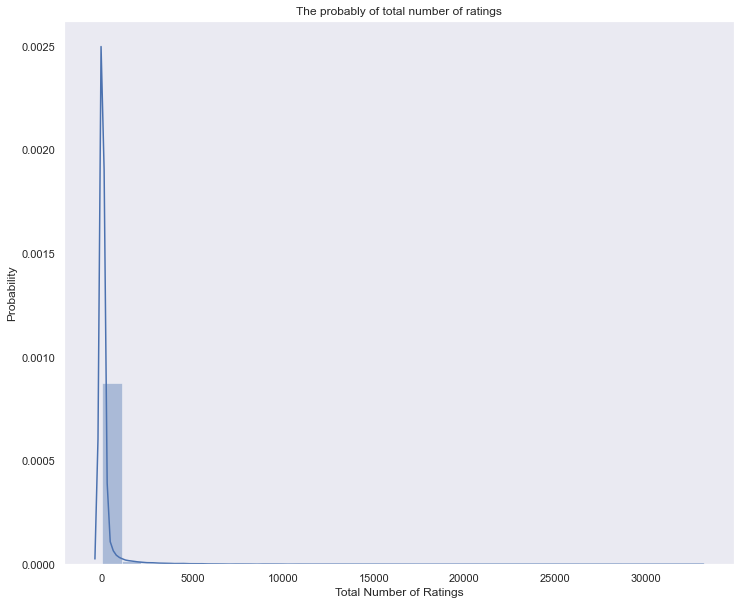

In [60]:
# Bar plot showing the total number of ratings
plt.figure(figsize = (12, 10))
sns.distplot(df_ratings['total ratings'],bins = 30)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.title('The probably of total number of ratings')
plt.show()

<p> The majority of the movies have less than a 5000 ratings, the number of movies having more than 5000 ratings is very low.</p>

### Highly Rated Movies

In [61]:
df_ratings.sort_values('mean rating', ascending = False).head(10)

,mean rating,total ratings
title,,
Which Way Home (2009),5.0,1
Kaakha Kaakha (2003),5.0,1
Not Quite Human II (1989),5.0,1
Selling Isobel (2018),5.0,1
Sehar (2005),5.0,1
The Enchanted Sedan Chair (1905),5.0,1
K.G.F: Chapter 1 (2018),5.0,1
Hard Cash (2002),5.0,1
Everyone's Going to Die (2013),5.0,1


In [62]:
print('Total no of users that gave rating of 5.0 : ', len(df_ratings.loc[df_ratings['mean rating'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(df_ratings.loc[(df_ratings['mean rating'] == 5) & (df_ratings['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  964 

Total no of Individual users that gave rating of 5.0 :  935


<p> As you can see the total number of users rating a 5 is 964 and there are 935 of these raters only rated the movie once.</p>
<p> Therefore this can not be a good indicator while recommneding movies. As this factor only shows the preference of a single individual.</p> <p> A good recommendation system would be taking highly and heavily rated movies together</p>

### Join Plot of Mean Rating vs. Total Number of Ratings

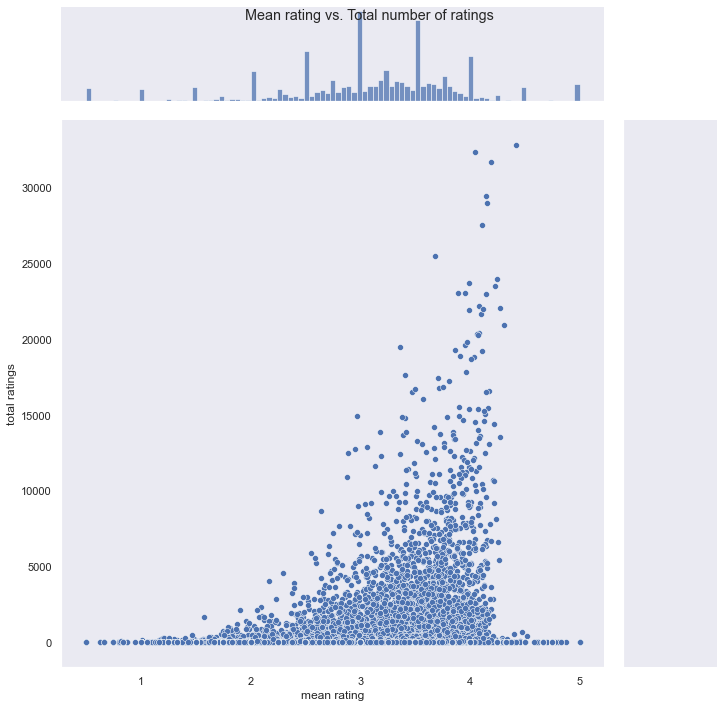

In [63]:
# A joint plot comparing both aspects
p = sns.jointplot(x = 'mean rating', y = 'total ratings', data = df_ratings, height = 10)
p.fig.suptitle('Mean rating vs. Total number of ratings')
plt.show()

<p> There is a huge density region corresponding to 0-5000 number of users rating and mean rating between 3-4.</p>

### Movies that recieved the least ratings

In [64]:
df_combined.groupby('title')['rating'].count().nsmallest(25)

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    1
#Female Pleasure (2018)                                    1
#Lucky Number (2015)                                       1
#Stuck (2014)                                              1
$1,000 on the Black (1966)                                 1
$uperthief: Inside America's Biggest Bank Score (2012)     1
'Master Harold'... and the Boys (1985)                     1
'Pimpernel' Smith (1941)                                   1
'Til Madness Do Us Part (2013)                             1
...ing (2003)                                              1
.hack Liminality In the Case of Kyoko Tohno                1
.hack Liminality: In the Case of Mai Minase                1
.hack//Beyond the World (2012)                             1
00 Schneider - Im Wendekreis der Eidechse (2013)           1
008: Operation Exterminate (1966)                          1
07/27/1978 (2017)                                          1
08/15 (1954)      

<p> This shows the unpopular movies get very low number of  ratings so it will be be harder to recommend these movies to other users as there is not enough historical data needed in order to predict.</p>

### Sex and Animations

Imagine a parent that doesn't assume all animated movies to be child-friendly. Such a parent is wise when considering the existence of animations such as "South Park" and "The Trailer Park Boys". If this parent were to have the data we do, the parent could check the relevance of adult tags for a particular animation before allowing their child to watch that animation.

In [65]:
genome_tags[genome_tags['tag']=='sex']

,tagId,tag
904,905,sex


In [66]:
movies[movies['title']=='Toy Story (1995)']['movieId']

0    1
Name: movieId, dtype: int64

In [67]:
genome_scores[np.logical_and(genome_scores['movieId']==1, genome_scores['tagId']==905)]

,movieId,tagId,relevance
904,1,905,0.025


The tag 'sex' has a 2.5% relevance to the animated movie 'Toy Story'. The paranoid parent can safely allow their young child to watch 'Toy Story'.

<a id = 'Recommend'></a><br>
# 4. Recommender Systems
[Back to table of Contents](#Table_Contents)

## What is a Recommender System

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries). <br> <br>
A recommender system seeks to estimate and predict user content preference regarding games, stories or videos. The system draws from data usage history, aiming at making suggestions based on the user’s (current) interests.  

In [68]:
Image(url= "https://www.bmsmain.com/wp-content/uploads/2018/06/Recommend.png",width = 800, height = 300)

## Types of Recomender Systems

<p> There will be two different apporaches used for the recommendation system, the approaches are:
    <ul><li> Content-Based filtering model</li>
    <li>Collaborative filtering model</li></ul></p>
    
<p> The idea behind content based (cognitive filtering) recommendation system is to recommend an item based on a comparison between the content of the items and a user profile. In simple words, the recommendations of a movie is based on the descriptions of other movies. </p>

<p> The theory behind collaborative filtering to work with collaboration with users or movie id. For example, there are two user A and B. User A likes movies P,Q,R,S and user B likes Q,R,S,T. Since movies Q, R and S are similar to both users, therefore movie P will be recommended to user B and movie T will be recommended to user A. </p>

In [69]:
Image(url= "https://miro.medium.com/max/700/1*mz9tzP1LjPBhmiWXeHyQkQ.png", width = 800, height = 300)

## Content Based Filtering

Content-based Filtering. Content-based filtering uses item features based on content to recommend other items similar to what the user likes, based on their previous actions or explicit feedback <br>

## Collabrative Based Filtering

Collaborative filtering filters information by using the interactions and data collected by the system from other users. It's based on the idea that people who agreed in their evaluation of certain items are likely to agree again in the future 

Lets use an example to understand collaborative filtering better. If person A enjoys 4 movies, The Matrix, Interstellar, Forrest Gump and Inception. Person B likes the movies, The Matrix, Interstellar, Forrest Gump and Fight Club. Person A and B almost have similar interests, therefore we can say with some certainty that A should like Fight Club and B should like Inception. The collaborative filtering algorithm uses 'User Behaviour' for recommeding items. This is one of the most widely used algorithm in the industry and is not dependent on additional information. There are different types of collaborating filtering techniques, the memory based and model based techniques will be used to make predictions. The memory based algorithm consists of User-based and Item-based collborative filtering and Model based uses a step to reduce or compress the large but sparse user-item matrix. One of the methods used to reduce the dimensions is called matrix factorization. If the matrix is mostly empty then reducing it can improve the models performance.

<a id="seven"></a>
# 5. Feature Engineering
<a class="anchor" id="1.1"></a>
---
    
| ⚡ Description: Feature engineering ⚡ |
| :--------------------------- |
| In this section the data is processed further, creating new features - as identified in the EDA phase. |

<a id="eight"></a>
# 6. Model Creation
<a class="anchor" id="1.1"></a>
---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, models are created inorder to accurately recommend movies. |

---

## Content-based

Content-based recommendation systems come with pros and cons. When making predictions for how a new user would rate a movie, content-based filtering does not suffer from the cold-start problem. Because recommendations from content-based recommendation systems are independent of users and based only on content (items), the same content is recommended for every user with the assumption that all users like similar content. This assumption, we feel, holds true far too seldom. 

In [ ]:
train_df[train_df['movieId']==2][:4]

The output of the code cell above serves as evidence against the assumption of user liking similar content. The movie with movie ID '2' was rated very differently by different users.

### Preprocessing

For our content-based recommendation system we require features of the items, which we can use to compute similarities between items. The items in our use case are movies. Our goal is to build a vocabulary describing the various movies, which we will then vectorise to use as features. To vectorise the vocabulary we must compile all the text data we have on the movies into a single column of a DataFrame.

#### IMBD

Let us first collect the text features from the *imbd* DataFrame.

Since we are working with a lot of data, we will removes spaces of features in our vocabulary to reduce the required computational resources. Doing this, "John Lasseter", which would cause the creation of two features, for example, becomes "JohnLasseter", a single feature. This also allows to vectorise with just unigrams and mitigates the utility of bigrams, thus saving us further computational power.

In [ ]:
def remove_spaces(df):
    df = df.copy()
    for col in df.columns:
        if col in df._get_numeric_data().columns:
            continue
    #There is no point in removing spaces from the 'title' column of the movies DataFrame, since this column will not 
    # be used as a feature.
        elif col == 'title':
            continue
        else:
            df[col] = df[col].str.replace(" ","")
    return df

In [ ]:
imbd = remove_spaces(imbd)

To reduce the number of features generated and therewith the required computational resources, we have omited the inclusion of cast and plot keywords.

In [ ]:
# imbd['all features imbd'] = ' ' + imbd['plot_keywords'] + ' ' + imbd['title_cast'] + ' ' + imbd['director']
imbd['all features imbd'] = ' ' + ' ' +imbd['director']

In [ ]:
imbd['all features imbd'] = imbd['all features imbd'].str.replace("|"," ")

In [ ]:
imbd.head()

###### Convert to Spark DataFrame

Merging of Pandas DataFrame of this size is not computationaly feasible given our resources, thus we work around this by making use of Spark DataFrames and Spark to merge DataFrames. This requires to convert Pandas DataFrames to Spark DataFrames to allow for merging later on.

In [ ]:
schema = StructType([StructField('movieId', StringType(), True),
                    StructField('all features imbd', StringType(), True)])

In [ ]:
imbd_sp = spark.createDataFrame(imbd[['movieId','all features imbd']],schema=schema)

#### Movies

Here we apply the same operations we did on the *imbd* DataFrame on the *movies* DataFrame.

In [ ]:
movies = remove_spaces(movies)

In [ ]:
movies['all features movies'] = movies['genres']

In [ ]:
movies['all features movies'] = movies['all features movies'].str.replace("|"," ")

In [ ]:
movies.head()

###### Convert to Spark DataFrame

In [ ]:
schema = StructType([StructField('movieId', StringType(), True),
                    StructField('all features movies', StringType(), True)])

In [ ]:
movies_sp = spark.createDataFrame(movies[['movieId','all features movies']],schema=schema)

#### Tags

In [ ]:
tags.head()

In [ ]:
tags['all features tags']=tags['tag']

#### Putting all features together

In the following cells we merge our data to attain a final DataFrame with all the features we will use for the movies. We then format this final DataFrame.

In [ ]:
movieId_features_df = movies_sp
movieId_features_df = movieId_features_df.join(imbd_sp,on='movieId',how='inner')
# movieId_features_df = movieId_features_df.join(tags_sp,on='movieId',how='inner')

In [ ]:
movieId_features_df = movieId_features_df.toPandas()

In [ ]:
movieId_features_df['all features'] = (movieId_features_df['all features movies'] + ' ' +
                                       movieId_features_df['all features imbd'] + ' ')# +
#                                        movieId_features_df['all features tags']) + ' '

In [ ]:
#movieId_features_df.drop(['all features movies','all features imbd','all features tags'],axis=1,inplace=True)
movieId_features_df.drop(['all features movies','all features imbd'],axis=1,inplace=True)

In [ ]:
movieId_features_df.head().iloc[0][1]

Importantly, we require our response variable in the DataFrame. The response variable in our use case is 'rating', the ratings assigned to movies by the various users. In the training data we have several ratings for many movies. What we require is a single rating for each movie. To attain a single rating for each movie and simultaneously make each row represent a single movie, we group the data by the movie IDs and compute the average rating for each movie. Furthermore, we drop the 'timestamp' column and the 'userId' column, since in content-based systems the recommendations and predicted ratings are determined by the ratings of the items only and are independent of the users.

In [ ]:
train = train.drop('timestamp')
train = train.drop('userId')

In [ ]:
schema = StructType([StructField('movieId', StringType(), True),
                    StructField('all features', StringType(), True)])
movieId_features_df = spark.createDataFrame(movieId_features_df,schema=schema)

In [ ]:
training = train.join(movieId_features_df.drop('all features'),on='movieId', how='inner')
training = training.groupBy('movieId').mean()
training = training.drop('avg(movieId)')

In [ ]:
training.show()

In [ ]:
movieId_features_df = movieId_features_df.join(training,on='movieId').drop('avg(rating)')

In [ ]:
movieId_features_df.show()

In [ ]:
training = training.toPandas()
movieId_features_df = movieId_features_df.toPandas()

In [ ]:
movieId_features_df.shape

Now that we have a DataFrame with all the features, we can finally vectorise

In [ ]:
vectorizer = TfidfVectorizer(analyzer='word')
tf_matrix = vectorizer.fit_transform(movieId_features_df['all features'])

In [ ]:
tf_matrix.shape

We can now use this matrix of features to attain a similarity matrix, which we can use to give recommendations based on similarity of movies.

When producing normalised vectors, cosine_similarity and linear_kernel are equivalent, however, linear_kernel is faster(https://scikit-learn.org/stable/modules/metrics.html#linear-kernel).

In [ ]:
cosine_sim_items = linear_kernel(tf_matrix,tf_matrix)

In [ ]:
cosine_sim_items.shape

### Model

With our feature matrix of the movies, *tf_matrix*, we can predict ratings of movies for which we have features.

In [ ]:
def get_rating(movie_id):
    """ Docstring """
    clf = KNeighborsRegressor(n_neighbors=5)
    X = tf_matrix
    y = training['avg(rating)']
    clf.fit(X, y)
    
    movie_index = movieId_features_df[movieId_features_df['movieId']==movie_id].index
    
    try:
        rating = clf.predict(tf_matrix[movie_index])
    #If the ID of a movie for which we do not have features is given, we output 2.5 as the predicted rating
    except ValueError:
            rating = [2.5]
    
    return rating[0]

In [ ]:
get_rating('148')

The predicted rating of the movie with movie ID '148' is about 0.4 more than the actual average rating.

In [ ]:
clf = KNeighborsRegressor(n_neighbors=5)
X = tf_matrix
y = training['avg(rating)']
clf.fit(X, y)
content_b_KNN_preds = clf.predict(tf_matrix)

In [ ]:
params = {"model": "KNN",
          "filtering":"content-based",
          "rank": 10,
          "maxiIter": 10,
          "regParam": 0.1,
          "numUserBlocks": 10,
          "numItemBlocks": 10,
          "implicitPrefs": False,
          'alpha':1.0,
          'userCol':'userId',
          'itemCol':'movieId',
          'seed':None,
          'ratingCol':'rating',
          'nonnegative':False,
          'checkpointInterval':10,
          'intermediateStorageLevel':'MEMORY_AND_DISK',
          'finalStorageLevel':'MEMORY_AND_DISK',
          'coldStartStrategy':'nan',
          'blockSize':4096,
          }
experiment.log_parameters(params)

In [ ]:
content_b_KNN_preds = pd.DataFrame(content_b_KNN_preds)
content_b_KNN_preds.columns = ['rating']
content_b_KNN_preds.index = movieId_features_df['movieId']
content_b_KNN_preds = content_b_KNN_preds.reset_index()

In [ ]:
schema = StructType([StructField('movieId', StringType(), True),
                    StructField('rating', DoubleType(), True)])
content_b_KNN_preds = spark.createDataFrame(content_b_KNN_preds,schema=schema)

In [ ]:
test = spark.read.csv('test.csv',inferSchema=True,header=True)

In [ ]:
content_b_sub = test.join(content_b_KNN_preds,on='movieId',how='left')

In [ ]:
content_b_sub = content_b_sub.toPandas()

In [ ]:
content_b_sub['rating'].fillna(2.5,inplace=True)

In [ ]:
content_b_sub.sort_values(['userId', 'movieId'],inplace = True)
content_b_sub['userId'] = content_b_sub['userId'].astype(str)
content_b_sub['movieId'] = content_b_sub['movieId'].astype(str)
content_b_sub['Id'] = content_b_sub[['userId','movieId']].apply('_'.join, axis=1)
content_b_sub.drop(['userId','movieId'],axis=1,inplace=True)

In [ ]:
content_b_sub

In [ ]:
content_b_sub.to_csv('content-based_KNN.csv',index=False)

#### Evaluation

Our content-based K Nearest Neighbours model, with null values filled with 2.5, gets a RMSE score of **1.10458** on Kaggle.

In [ ]:
experiment.log_metrics({'RMSE':1.10458})

#### Recommending Movies

Finally, let's make use of our similarity matrix to recommend movies.

The following code cell was copied (from the train "Introduction to Recommender Systems" made available to us on Athena) and then adapted.

In [ ]:
def content_generate_top_N_recommendations(movie_list, N=10):
    """ Docstring"""
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    try:
        all_recommendations=[]
        movie_title = movie_list[0]
        movie_id = movies[movies['title']==movie_title]['movieId'].iloc[0]
        movie_index = movieId_features_df[movieId_features_df['movieId']==movie_id].index[0]
        # Extract all similarity values computed with the reference book title
        sim_scores = list(enumerate(cosine_sim_items[movie_index]))
        # Sort the values, keeping a copy of the original index of each value
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Select the top-N values for recommendation
        sim_scores = sim_scores[0:4]
        # Collect indexes 
        movie_indices = [i[0] for i in sim_scores]
        all_recommendations.append(list(movies.iloc[movie_indices]['title'].reset_index().drop('index',axis=1)['title']))
        
        movie_title = movie_list[1]
        movie_id = movies[movies['title']==movie_title]['movieId'].iloc[0]
        movie_index = movieId_features_df[movieId_features_df['movieId']==movie_id].index[0]
        # Extract all similarity values computed with the reference book title
        sim_scores = list(enumerate(cosine_sim_items[movie_index]))
        # Sort the values, keeping a copy of the original index of each value
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Select the top-N values for recommendation
        sim_scores = sim_scores[0:3]
        # Collect indexes 
        movie_indices = [i[0] for i in sim_scores]
        all_recommendations.append(list(movies.iloc[movie_indices]['title'].reset_index().drop('index',axis=1)['title']))
        
        movie_title = movie_list[2]
        movie_id = movies[movies['title']==movie_title]['movieId'].iloc[0]
        movie_index = movieId_features_df[movieId_features_df['movieId']==movie_id].index[0]
        # Extract all similarity values computed with the reference book title
        sim_scores = list(enumerate(cosine_sim_items[movie_index]))
        # Sort the values, keeping a copy of the original index of each value
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Select the top-N values for recommendation
        sim_scores = sim_scores[0:3]
        # Collect indexes 
        movie_indices = [i[0] for i in sim_scores]
        all_recommendations.append(list(movies.iloc[movie_indices]['title'].reset_index().drop('index',axis=1)['title']))
        all_recommendations = [item for sublist in all_recommendations for item in sublist]
        #/Convert the indexes back into titles
        return all_recommendations[:N]
    except IndexError:
        return('Movie not in database. Sorry not sorry')

In [ ]:
movieId_features_df.to_csv('movieId_features_df.csv',index=False)

In [ ]:
content_generate_top_N_recommendations(['Awfully Big Adventure, An (1995)', 'Toy Story (1995)', 'Four Rooms (1995)'])

## Collaborative
### SVD

Surprise is a scikit building and analyzing recommender systems that deal with explicit rating data.
In the context of recommendation systems it is used as a collaborative filtering algorithm to predict ratings 
based on the reactions of similar users. Matrix Factorization techiques are employed which is more effective at discovering latent features and underlying interactions between users and items.
Gradient descent is then used to minimize the squared error between predicted rating and actual rating.

One percent of the data was randomly sampled to save on run time as well as computational expenses on AWS.

In [ ]:
p = 0.01  # 1% of data
train_data= pd.read_csv(
         "train.csv",
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)
test_data= pd.read_csv("test.csv")
sample_submission= pd.read_csv('sample_submission.csv')

In order to load a dataset from a pandas dataframe, we need the load_from_df method, we also need a Reader object with a rating_scale parameter. 
The rating_scale parameter is the range of ratings in our loaded data. The data is split into a train and test set.

In [ ]:
d = {'ItemID':list(train_data.movieId), 'UserID':list(train_data.userId), 'Rating':list(train_data.rating)}
df = pd.DataFrame(d)
reader = Reader(rating_scale=(0.5,5.0))
Data = Dataset.load_from_df(df[['UserID','ItemID','Rating']],reader)

train, test = train_test_split(Data,test_size=0.25)
svd = SVD()
svd.fit(train)

The model is used to make predictions on the test set and an RMSE score is calculated.

In [ ]:
svd.predict('UserID','ItemID')
predictions = svd.test(test)
SVD_RMSE = accuracy.rmse(predictions)

The model has to be applied to each tuple in the test data (movieId and userId) in order to make predictions.

In [ ]:
for i in test_data.itertuples():
    a=[]
    user= i.userId
    item= i.movieId
    predictions = svd.predict(user,item)
    a.append(predictions.est)

In [ ]:
Sub = sample_submission[['Id']]
Sub['rating'] = pd.Series(a)
Sub['rating'].fillna(2.5, inplace=True)
Sub.to_csv("surprise.csv", index=False)

### Alternating Least Squares

pySpark's ALS (Alternating Least Squares) algorithm utilises matrix factorisation, factorising a matrix containing users, ratings and items (in our case the training data with the users, their rating and the movies) into two factors, a user matrix and an item matrix. The equation solved by the ALS algorithm is such that if either the user matrix or item matrix is fixed, a quadratic equation is attained, from which the the matrix not fixed can be calculated directly. In this case the item matrix will be fixed.

In [ ]:
#showing the ALS algorithm and how it works
Image(url= "https://miro.medium.com/max/1000/1*ygHEXIhg5FtkSD3UQaldgw.png", width = 1000, height = 600)

In [ ]:
#Prepare Data
train = spark.read.csv('train.csv', inferSchema=True, header=True)
test = spark.read.csv('test.csv', inferSchema=True, header=True)
train = train.drop('timestamp')

In [ ]:
#Split Data
train_df, test_df = train.randomSplit([0.8,0.2], seed = 42)

In [ ]:
#Train model
als =  ALS(maxIter=5, regParam=0.01, rank = 5, userCol="userId", itemCol="movieId", ratingCol="rating", seed=42)

model = als.fit(train_df)

In [ ]:
# Make Predictions
predictions = model.transform(test_df)

In [ ]:
### Summary of predictions
predictions.describe().show()

When there are cold start users or items to make predictions on , the predictions will produce NaN as shown in the summary. This will cause an NaN when calculating the RMSE and MAE, therefore need to find a way to deal with NaN values. One way is to fill NaN values with the weighted average rating of the user.

In [ ]:
# dealing with cold start by adding in the weighted average for ratings
predictions = predictions.na.fill(3.5)

In [ ]:
# Evaluate RMSE
evaluator_rmse = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol="prediction")
rmse_als = evaluator_rmse.evaluate(predictions)

# Evaluate MAE
evaluator_mae = RegressionEvaluator(metricName='mae', labelCol='rating', predictionCol="prediction")
mae_als = evaluator_mae.evaluate(predictions)

print('RMSE: ', rmse_als)
print('MAE: ', mae_als)

### Parameter Tuning

In [ ]:
# model
als =  ALS(maxIter=20, regParam=0.05, rank = 5, userCol="userId", itemCol="movieId", ratingCol="rating", seed=42)
model = als.fit(train_df)

#predict
predictions_tuned = model.transform(test_df)

#fill na
predictions_tuned =  predictions_tuned.na.fill(3.5) 

#evaluate
rmse_tuned_als = evaluator_rmse.evaluate(predictions_tuned)
mae_tuned_als = evaluator_mae.evaluate(predictions_tuned)

print('RMSE: ', rmse_tuned_als)
print('MAE: ', mae_tuned_als)

### Predicting The  Ratings

In [ ]:
#Use best parameters for algorithm
als =  ALS(maxIter=20, regParam=0.05, rank=5, userCol="userId", itemCol="movieId", ratingCol="rating", seed=42)

#train best model
bestmodel = als.fit(train)

#Predict unseen test 
prediction_final = bestmodel.transform(test)

In [ ]:
# Get count of nan or missing values in pyspark
prediction_final.select([count(when(isnan(c), c)).alias(c) for c in prediction_final.columns]).show()

In [ ]:
# make into dataframe
prediction_df = prediction_final.select("*").toPandas()

In [ ]:
#sort for making a submission
prediction_df.sort_values(['userId', 'movieId'],inplace=True)

#fill na to make submission
prediction_df.fillna(value = 3.5,inplace = True)

prediction_df.head()

In [ ]:
# Prepare for submission
prediction_df['userId'] = prediction_df['userId'].astype(str)
prediction_df['movieId'] = prediction_df['movieId'].astype(str)
prediction_df['Id'] = prediction_df[['userId','movieId']].apply('_'.join, axis=1)

In [ ]:
Submission_als = pd.DataFrame({"Id":prediction_df['Id'], 
                           "rating":prediction_df['prediction']})
Submission_als.to_csv("submission_als.csv", index=False)

In [ ]:
Submission_als.head(10)

In [ ]:
params = {"model": "ALS",
          "filtering": "collaborative",
          "rank": 10,
          "maxiIter": 10,
          "regParam": 0.1,
          "numUserBlocks": 10,
          "numItemBlocks": 10,
          "implicitPrefs": False,
          'alpha':1.0,
          'userCol':'userId',
          'itemCol':'movieId',
          'seed':None,
          'ratingCol':'rating',
          'nonnegative':False,
          'checkpointInterval':10,
          'intermediateStorageLevel':'MEMORY_AND_DISK',
          'finalStorageLevel':'MEMORY_AND_DISK',
          'coldStartStrategy':'nan',
          'blockSize':4096,
          }
experiment.log_parameters(params)

### Evaluation

In [ ]:
experiment.log_metrics({'RMSE':0.81673})

This alternating least squares model, with this method of filling null values achieves an **RMSE score of 0.81673** on Kaggle.

In [ ]:
experiment.end()
experiment.display()

<a id="nine"></a>
# 7.  Model Improvements
<a class="anchor" id="1.1"></a>

<a id="ten"></a>
# 8.  Model Evaluation
<a class="anchor" id="1.1"></a>

<a id="eleven"></a>
# 9. Discuss chosen methods logic
<a class="anchor" id="1.1"></a>

<a id="twelve"></a>
# 10. Conclusion
<a class="anchor" id="1.1"></a>

<a id="twelve"></a>
# 11. Recommendations
<a class="anchor" id="1.1"></a>